## Work
1. 請將 Epoch 加到 500 個，並觀察 learning curve 的走勢
2. 請將 Optimizer 換成 SGD，並觀察 learning curve 的走勢

In [7]:
import os
import keras

# 本作業可以不需使用 GPU, 將 GPU 設定為 "無" (若有 GPU 且想開啟，可設為 "0")
os.environ["CUDA_VISIBLE_DEVICES"] = ""

In [8]:
# 從 Keras 的內建功能中，取得 train 與 test 資料集
train, test = keras.datasets.cifar10.load_data()

In [9]:
# 將 X 與 Y 獨立放進變數
x_train, y_train = train
x_test, y_test = test
# 資料前處理 - 標準化
x_train = x_train / 255.
x_test = x_test / 255.

# 將資料從圖形 (RGB) 轉為向量 (Single Vector)
x_train = x_train.reshape((len(x_train), -1))
x_test = x_test.reshape((len(x_test), -1))

# 將目標轉為 one-hot encoding
y_train = keras.utils.to_categorical(y_train, num_classes=10)
y_test = keras.utils.to_categorical(y_test, num_classes=10)

In [10]:
def build_mlp():
    """Code Here
    建立你的神經網路
    """
    input_layer = keras.layers.Input([x_train.shape[-1]])
    x = keras.layers.Dense(units=512, activation="relu")(input_layer)
    x = keras.layers.Dense(units=256, activation="relu")(x)
    x = keras.layers.Dense(units=128, activation="relu")(x)
    out = keras.layers.Dense(units=10, activation="softmax")(x)
    
    model = keras.models.Model(inputs=[input_layer], outputs=[out])
    
    return model

In [11]:
"""
Compile 模型
"""
model = build_mlp()
# 用 Keras 內建方法檢視模型各層參數量
model.summary()

optimizer = keras.optimizers.Adam(lr=0.001)
model.compile(loss="categorical_crossentropy", metrics=["accuracy"], optimizer=optimizer)

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_2 (InputLayer)         (None, 3072)              0         
_________________________________________________________________
dense_5 (Dense)              (None, 512)               1573376   
_________________________________________________________________
dense_6 (Dense)              (None, 256)               131328    
_________________________________________________________________
dense_7 (Dense)              (None, 128)               32896     
_________________________________________________________________
dense_8 (Dense)              (None, 10)                1290      
Total params: 1,738,890
Trainable params: 1,738,890
Non-trainable params: 0
_________________________________________________________________


In [12]:
"""
設定要訓練的 Epoch 數
"""
model.fit(x_train, y_train, 
          epochs=100, 
          batch_size=256, 
          validation_data=(x_test, y_test), 
          shuffle=True)

Train on 50000 samples, validate on 10000 samples
Epoch 1/100
50000/50000 [==============================] - 12s 236us/step - loss: 1.9568 - acc: 0.2963 - val_loss: 1.8232 - val_acc: 0.3325
Epoch 2/100
50000/50000 [==============================] - 11s 229us/step - loss: 1.7267 - acc: 0.3820 - val_loss: 1.7318 - val_acc: 0.3808
Epoch 3/100
50000/50000 [==============================] - 12s 231us/step - loss: 1.6315 - acc: 0.4173 - val_loss: 1.6073 - val_acc: 0.4200
Epoch 4/100
50000/50000 [==============================] - 12s 237us/step - loss: 1.5605 - acc: 0.4439 - val_loss: 1.5478 - val_acc: 0.4511
Epoch 5/100
50000/50000 [==============================] - 12s 244us/step - loss: 1.5153 - acc: 0.4592 - val_loss: 1.5192 - val_acc: 0.4558
Epoch 6/100
50000/50000 [==============================] - 13s 256us/step - loss: 1.4770 - acc: 0.4730 - val_loss: 1.4808 - val_acc: 0.4711
Epoch 7/100
50000/50000 [==============================] - 14s 285us/step - loss: 1.4387 - acc: 0.4865 - val_l

50000/50000 [==============================] - 11s 212us/step - loss: 0.5742 - acc: 0.7950 - val_loss: 2.0465 - val_acc: 0.5147
Epoch 59/100
50000/50000 [==============================] - 11s 215us/step - loss: 0.5537 - acc: 0.8025 - val_loss: 1.9996 - val_acc: 0.5145
Epoch 60/100
50000/50000 [==============================] - 11s 220us/step - loss: 0.5389 - acc: 0.8084 - val_loss: 2.0232 - val_acc: 0.5155
Epoch 61/100
50000/50000 [==============================] - 10s 208us/step - loss: 0.5117 - acc: 0.8173 - val_loss: 2.0635 - val_acc: 0.5092- acc: 0 - ETA: 2s - loss: 0.5015 -  - ETA: 1s - 
Epoch 62/100
50000/50000 [==============================] - 11s 210us/step - loss: 0.5239 - acc: 0.8130 - val_loss: 2.0688 - val_acc: 0.5096
Epoch 63/100
50000/50000 [==============================] - 11s 211us/step - loss: 0.5021 - acc: 0.8208 - val_loss: 2.1326 - val_acc: 0.5155acc: 0.82
Epoch 64/100
50000/50000 [==============================] - 11s 212us/step - loss: 0.4880 - acc: 0.8254 - val

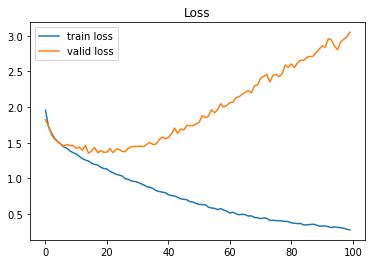

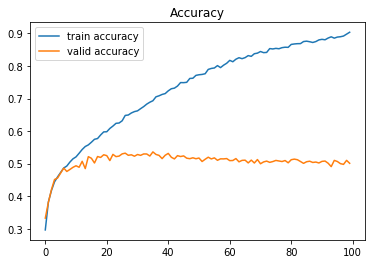

In [13]:
import matplotlib.pyplot as plt
# 以視覺畫方式檢視訓練過程

train_loss = model.history.history["loss"]
valid_loss = model.history.history["val_loss"]

train_acc = model.history.history["acc"]
valid_acc = model.history.history["val_acc"]

plt.plot(range(len(train_loss)), train_loss, label="train loss")
plt.plot(range(len(valid_loss)), valid_loss, label="valid loss")
plt.legend()
plt.title("Loss")
plt.show()

plt.plot(range(len(train_acc)), train_acc, label="train accuracy")
plt.plot(range(len(valid_acc)), valid_acc, label="valid accuracy")
plt.legend()
plt.title("Accuracy")
plt.show()